In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
h4_df = pd.read_csv("./data/Prices.csv", sep=";", decimal=",")
h4_df.Price.mean()

28.995583333333332

In [2]:
h4_df = pd.read_csv("./data/H4.csv", sep=";", decimal=",")
h4_df.Time = h4_df.Time.str.split(expand=True)[1].str.split(":", expand=True)[0]

prices_df = pd.read_csv("./data/Prices.csv", sep=";", decimal=",")
prices_df.Time = prices_df.Time.str.split(expand=True)[1].str.split(":", expand=True)[0]
prices_df

,Time,Price,Unnamed: 2,Unnamed: 3
0,00,22.39,NaN,NaN
1,01,20.59,NaN,NaN
2,02,16.81,NaN,NaN
3,03,17.41,NaN,NaN
4,04,17.02,NaN,NaN
...,...,...,...,...
8755,19,35.05,NaN,NaN
8756,20,33.02,NaN,NaN
8757,21,33.71,NaN,NaN
8758,22,27.95,NaN,NaN


In [3]:
h4_df

,Time,Power
0,00,0.001293
1,00,0.001237
2,00,0.001346
3,00,0.001222
4,00,0.001224
...,...,...
525595,23,0.001464
525596,23,0.001220
525597,23,0.001232
525598,23,0.001267


In [47]:
pwr = h4_df.groupby("Time").Power.mean()
pwr = (pwr-min(pwr)) / (max(pwr) - min(pwr))
pwr = np.round(pwr, 2)

price = prices_df.groupby("Time").Price.mean()
price = (price-min(price)) / (max(price) - min(price))
price = np.round(price, 2)

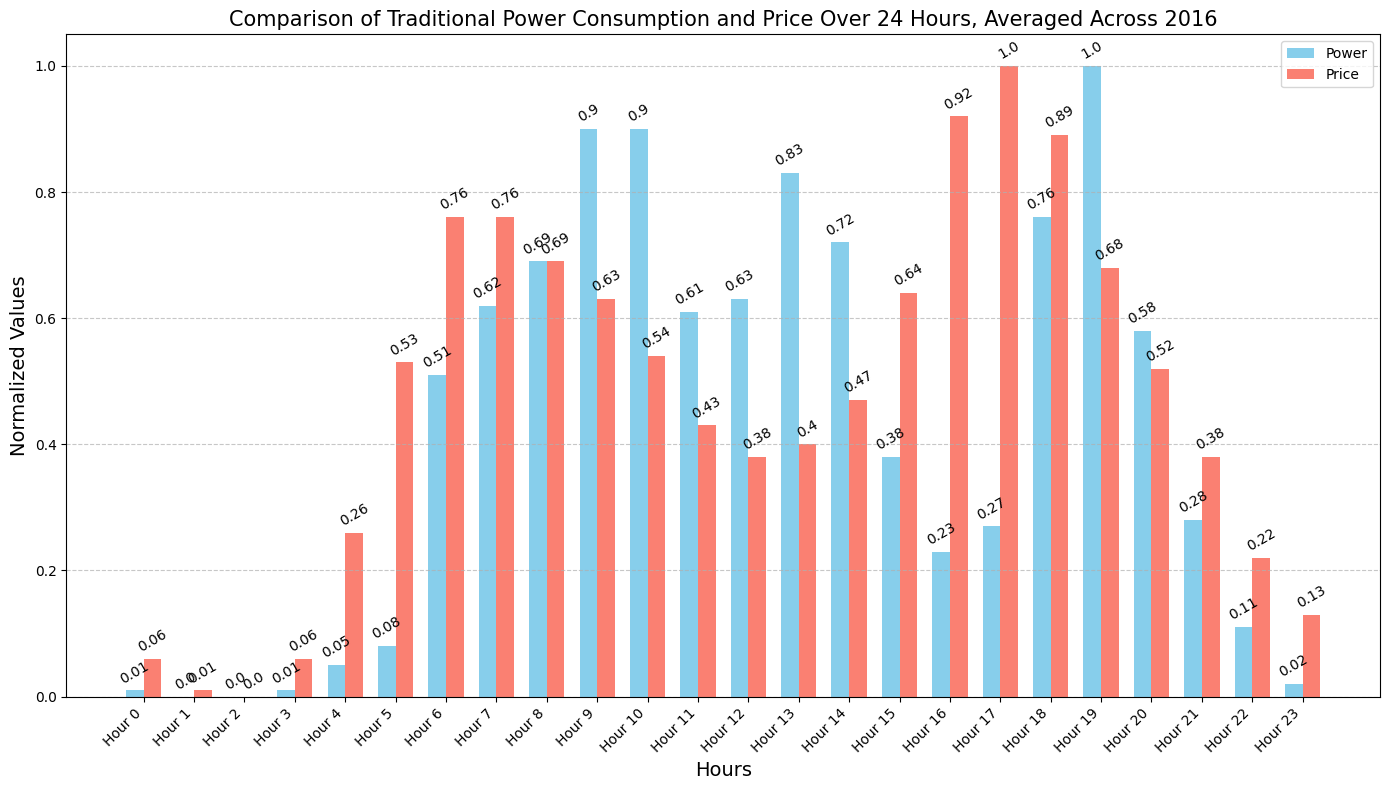

In [52]:
categories = [f'Hour {i}' for i in range(0, 24)]
values1 = pwr
values2 = price

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))  # Larger figure size

# Width of each bar
bar_width = 0.35

# Set the position of the bars on the x-axis
x = np.arange(len(categories))

# Plotting the bars
bars1 = ax.bar(x - bar_width/2, values1, bar_width, label='Power', color='skyblue')
bars2 = ax.bar(x + bar_width/2, values2, bar_width, label='Price', color='salmon')

# Adding labels, title, and grid
ax.set_xlabel('Hours', fontsize=14)
ax.set_ylabel('Normalized Values', fontsize=14)
ax.set_title('Comparison of Traditional Power Consumption and Price Over 24 Hours, Averaged Across 2016', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')  # Adjust rotation for better readability
ax.legend()

# Adding value labels on top of each bar
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=30)

add_value_labels(bars1)
add_value_labels(bars2)

# Adding a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()